--- In this example you can see how to obtain a cutout of an image and produce a .png of the cutout.

In [1]:
import numpy as np
from astropy.io import fits

In [2]:
image_dir = 'data' # define image directory relative to this script

In [3]:
f = 'f090w' # filter

In [4]:
sci = fits.getdata(f'{image_dir}/{f}_sci.fits') # read FITS file data into numpy array

--- calculate the standard deviation of the noise. This is necessary to properly scale the image.

In [5]:
pix = sci.flatten() #Â flatten the masked image to produce a list of pixels
negpix = pix[pix<0.0] # isolate negative pixels
sigma = -np.percentile(negpix, 31.7) #Â measure \sigma as demonstrated in example1.py.

--- cut out a portion of the image for analysis

In [6]:
x = sci.shape[0] // 2 # pixel x-centre of cutout, must be an integer
y = sci.shape[1] // 2  # pixel y-centre of cutout, must be an integer
r = 150 # width/2 of cutout, must be int

two ways of cutting out, either using a Python slice object

slices = [slice(x-r,x+r,None),slice(y-r,y+r,None)]<br>
centre = sci[slices]

or by simply doing:

In [7]:
centre = sci[x-r:x+r, y-r:y+r]

--- NOW MAKE A PLOT OF THE CUTOUT

In [8]:
import matplotlib.pyplot as plt

without scaling the image or providing limits (vmin, vmax) imshow will automatically scale the image to the largest and smallest values. However, as we saw in example1.py we sometimes have errnously high or low pixels.

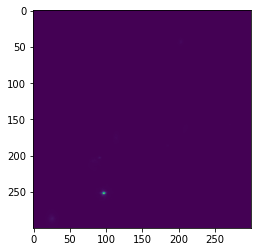

In [9]:
plt.imshow(centre) # no scaling/clipping
plt.show()

there are various things we can do here. For example, we could give imshow a min and max value to map between (any pixel values outside this range will be mapped to end of the colour scale)

In [10]:
vmin = 0
vmax = sigma*20

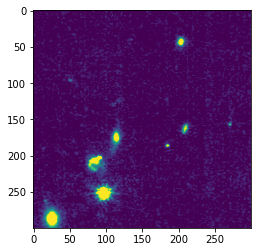

In [11]:
plt.imshow(centre, vmin = vmin, vmax = vmax) # any value >10*sigma will map to the end of the scale
plt.show()

we can also change the default colour map (https://matplotlib.org/examples/color/colormaps_reference.html)

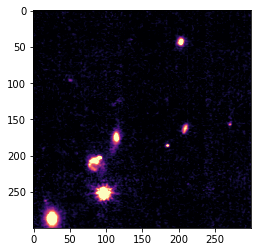

In [12]:
plt.imshow(centre, vmin = vmin, vmax = vmax, cmap = 'magma') # any value >10*sigma will map to the end of the scale
plt.show()

instead of showing images in interactive mode we often want to save a version. By default matplotlib provides space for axes labels etc. The below makes the axes (where the image is plotted) stretch across the full canvas and turns off the frame, ticks, and labels. This also sets the dots-per-inch (dpi) to be the equal to the size of the image in pixels. By setting the size to 1 inch we will then have a figure which is pixel perfect.

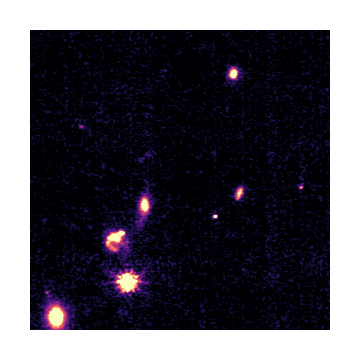

In [13]:
dpi = centre.shape[0] # set dots per inch equal to the number of pixels.
fig = plt.figure(figsize = (1, 1), dpi = dpi)
ax = fig.add_axes((0.0, 0.0, 1.0, 1.0)) # define axes to cover entire field
ax.axis('off') # turn off axes frame, ticks, and labels
ax.imshow(centre, vmin = vmin, vmax = vmax, cmap = 'magma') # shouldn't see much because the scale is dominated by outlier
fig.savefig('XDF_centre_f090w.png')